# Unit 5 - Financial Planning

In [176]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation


import warnings
warnings.filterwarnings('ignore')

import numpy as np

%matplotlib inline

In [177]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [178]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [179]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [180]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $47551.30
The current value of your 5.3 ETH is $13218.79


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [181]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [182]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

alpaca

In [183]:
# Format current date as ISO format
date = "31/07/2023"
# Split the date into day, month, and year
day, month, year = date.split("/")
# Convert to ISO format
iso_date = f"{year}-{month}-{day}"

# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = start_date
).df

# Reorganize the DataFrame
# Separate ticker data
# Create separate dataframes for each ticker
df_agg = df_portfolio[df_portfolio['symbol'] == 'AGG']
df_spy = df_portfolio[df_portfolio['symbol'] == 'SPY']

# Print the dataframes

# Concatenate the ticker DataFrames
df_concat = pd.concat([df_agg, df_spy])

print(df_concat)

                             open      high     low   close    volume  \
timestamp                                                               
2018-07-31 04:00:00+00:00  106.11  106.1756  106.05  106.06   5928141   
2018-07-31 04:00:00+00:00  280.70  282.0200  280.38  281.19  68584293   

                           trade_count        vwap symbol  
timestamp                                                  
2018-07-31 04:00:00+00:00        21794  106.093910    AGG  
2018-07-31 04:00:00+00:00       275208  281.218025    SPY  


In [184]:
# Pick AGG and SPY close prices
# Pick AGG and SPY close prices
agg_close_price = df_concat[df_concat['symbol'] == 'AGG']['close'].values[0]
spy_close_price = df_concat[df_concat['symbol'] == 'SPY']['close'].values[0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $106.06
Current SPY closing price: $281.19


In [185]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14059.50
The current value of your 200 AGG shares is $21212.00


### Savings Health Analysis

In [186]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

# Create savings DataFrame
data = {'amount': [crypto, shares]}
df_savings = pd.DataFrame(data, index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,60770.091596
shares,35271.500000


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

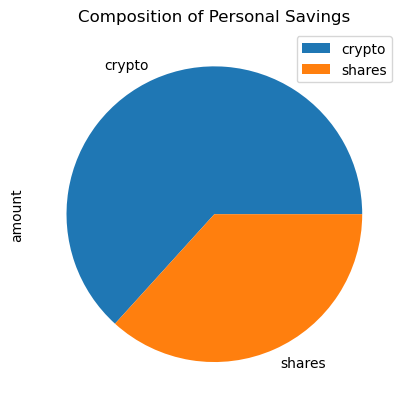

In [187]:
# Plot savings pie chart
# Plot savings pie chart
df_savings.plot.pie(y='amount', title="Composition of Personal Savings")


In [188]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()
print(f"Your total savings are ${round(total_savings,2)}")

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal.")
else:
    print(f"You are ${emergency_fund - total_savings} away from reaching your goal.")

Your total savings are $96041.59
Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [203]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-07-31', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-07-31', tz='America/New_York').isoformat()


In [204]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
df_agg = df_stock_data[df_stock_data['symbol'] == 'AGG']
df_spy = df_stock_data[df_stock_data['symbol'] == 'SPY']

# Concatenate the ticker DataFrames
df_concat = pd.concat([df_agg, df_spy])

# Display sample data
print(df_concat.head())

                             open      high      low   close   volume  \
timestamp                                                               
2018-07-31 04:00:00+00:00  106.11  106.1756  106.050  106.06  5928141   
2018-08-01 04:00:00+00:00  105.55  105.7600  105.512  105.70  4534062   
2018-08-02 04:00:00+00:00  105.76  105.7600  105.650  105.74  3671901   
2018-08-03 04:00:00+00:00  105.81  105.9799  105.810  105.97  2542872   
2018-08-06 04:00:00+00:00  106.03  106.1100  106.000  106.04  4120716   

                           trade_count        vwap symbol  
timestamp                                                  
2018-07-31 04:00:00+00:00        21794  106.093910    AGG  
2018-08-01 04:00:00+00:00        18024  105.682721    AGG  
2018-08-02 04:00:00+00:00        13787  105.721750    AGG  
2018-08-03 04:00:00+00:00        11998  105.924304    AGG  
2018-08-06 04:00:00+00:00        13656  106.067586    AGG  


In [205]:
## i had a multi-level index problem, so have done the below to create a multi-level index, with close prices isolated..nightmare

df_portfolio = df_concat.pivot(columns='symbol')
df_portfolio.columns = df_portfolio.columns.swaplevel(0, 1)
df_portfolio.sort_index(axis=1, level=0, inplace=True)

print(df_portfolio.head)

<bound method NDFrame.head of symbol                        AGG                                          \
                            close      high       low    open trade_count   
timestamp                                                                   
2018-07-31 04:00:00+00:00  106.06  106.1756  106.0500  106.11       21794   
2018-08-01 04:00:00+00:00  105.70  105.7600  105.5120  105.55       18024   
2018-08-02 04:00:00+00:00  105.74  105.7600  105.6500  105.76       13787   
2018-08-03 04:00:00+00:00  105.97  105.9799  105.8100  105.81       11998   
2018-08-06 04:00:00+00:00  106.04  106.1100  106.0000  106.03       13656   
...                           ...       ...       ...     ...         ...   
2023-07-25 04:00:00+00:00   97.70   97.7900   97.5700   97.58       20610   
2023-07-26 04:00:00+00:00   98.02   98.0650   97.6800   97.93       26939   
2023-07-27 04:00:00+00:00   97.18   97.9300   97.1050   97.84       32050   
2023-07-28 04:00:00+00:00   97.56   97.5900   

In [206]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

# Sims and trading days
num_sims = 500
num_trading_days = 252 * 30

#Portfolio balance
weights = [0.40, 0.60]



In [207]:
# Printing the simulation input data
#print(df_close_prices.head)

In [208]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# Monte Carlo sim

MC_30year = MCSimulation(
    portfolio_data = df_portfolio,
    weights = weights,
    num_simulation = num_sims,
    num_trading_days = num_trading_days
)
MC_30year.calc_cumulative_return()



Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010231,0.999372,0.987214,0.989813,0.992128,0.989357,0.995178,1.001634,1.000101,1.001628,...,1.001857,0.992496,0.987660,0.996514,1.008559,0.997813,0.994016,0.998939,0.997948,1.001199
2,1.008024,0.990684,0.985132,0.994866,1.009574,0.985470,0.981872,1.005952,1.001131,0.998514,...,1.019912,0.997679,0.995828,0.983234,1.005627,0.994825,0.980990,0.993604,0.998940,0.998485
3,1.011070,0.988550,0.973315,0.994228,1.004829,0.970589,0.987250,0.997515,0.988929,0.992705,...,1.021765,1.000237,0.993956,0.985210,1.013167,0.993422,0.986097,0.993827,1.003249,0.997283
4,1.027411,0.987689,0.983520,1.002846,1.015068,0.967886,0.980171,0.985491,0.983721,0.987158,...,1.028763,1.003917,1.006757,0.984954,1.030098,0.986138,0.980101,0.998181,1.007034,1.010353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.161918,2.487479,4.232945,1.804958,5.577322,2.851698,3.445147,6.929072,17.672454,13.309590,...,3.039202,5.827204,6.264154,1.225799,11.046417,1.694287,5.850299,1.402310,1.539731,5.613851
7557,3.190853,2.449205,4.254093,1.778418,5.590423,2.845586,3.484218,6.881764,17.679161,13.260757,...,3.041515,5.790420,6.277019,1.212175,11.008697,1.688891,5.904649,1.418678,1.541989,5.544614
7558,3.230369,2.439928,4.186271,1.786291,5.542666,2.842985,3.510552,6.841181,17.973606,13.341327,...,3.039926,5.730209,6.317341,1.223935,11.045350,1.683264,5.900737,1.434508,1.544963,5.514287
7559,3.223002,2.433833,4.228270,1.794312,5.515345,2.827146,3.468550,6.862675,18.227681,13.345317,...,3.067644,5.669972,6.291647,1.230706,11.032585,1.692743,5.872015,1.420586,1.545198,5.532169


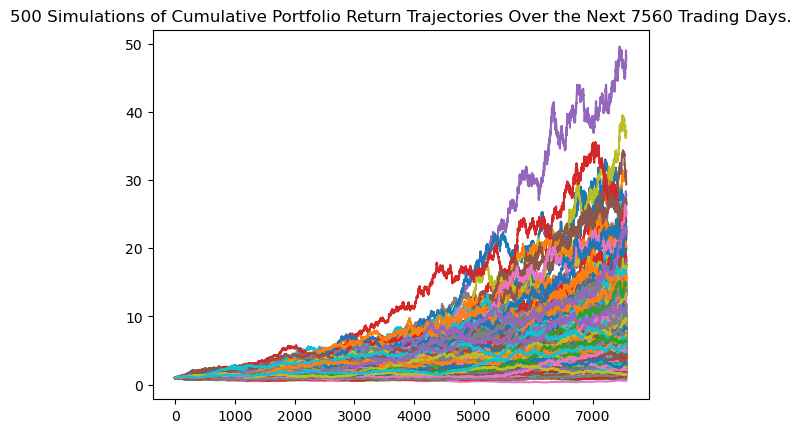

In [209]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()


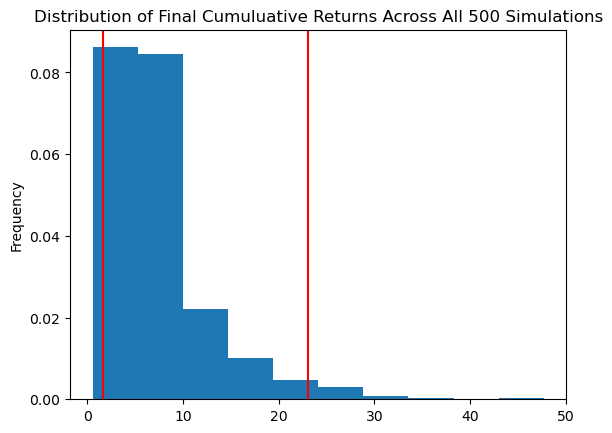

In [210]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [211]:
MC_summary_statistics = MC_30year.summarize_cumulative_return()
print(MC_summary_statistics)

## I kept reciving an error " 'Series' object has no attribute 'append' "  So I calculated the summary stats manually.....

AttributeError: 'Series' object has no attribute 'append'

In [212]:
# Fetch summary statistics from the Monte Carlo simulation results

# Fetch the last row of cumulative returns
last_cumulative_returns = MC_30year.simulated_return.iloc[-1]

# Calculate summary statistics
mean = last_cumulative_returns.mean()
median = last_cumulative_returns.median()
std_dev = last_cumulative_returns.std()

# Calculate 5% and 95% quantiles
quantile_5 = np.percentile(last_cumulative_returns, 5)
quantile_95 = np.percentile(last_cumulative_returns, 95)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print(f"5% Quantile: {quantile_5}")
print(f"95% Quantile: {quantile_95}")



Mean: 7.437962002154973
Median: 6.074300010173241
Standard Deviation: 5.5806480388651
5% Quantile: 1.897388116528081
95% Quantile: 18.321592014935764


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [213]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_upper = round(quantile_95 * initial_investment, 2)
ci_lower = round(quantile_5 * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $37947.76 and $366431.84


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [214]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_upper = round(quantile_95 * initial_investment, 2)
ci_lower = round(quantile_5 * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $56921.64 and $549647.76


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [216]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

# Sims and trading days
num_sims = 500
num_trading_days = 252 * 5

#Portfolio balance  --  10% bonds, 90% stocks
weights = [0.10, 0.90]



In [217]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = df_portfolio,
    weights = weights,
    num_simulation = num_sims,
    num_trading_days = num_trading_days
)

MC_5year.calc_cumulative_return()



Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006635,1.006466,0.983945,1.012701,1.020857,1.036032,1.005943,1.013452,0.974677,0.988873,...,1.016564,0.994970,0.993090,0.978518,1.014344,1.005551,1.010615,0.986867,1.004824,0.978754
2,1.019050,1.009536,0.960579,1.019166,1.036640,1.037309,0.995652,1.026590,0.972027,0.979330,...,1.015263,0.997488,0.985605,0.974043,1.008042,1.026375,1.002844,1.020404,1.022308,0.988912
3,1.021722,1.013832,0.953458,0.998448,1.032555,1.045731,1.001210,1.022885,0.972994,0.989202,...,1.002538,0.978205,0.970870,0.977294,1.016948,1.002978,1.009957,1.027198,1.025305,0.985139
4,1.032228,1.035548,0.956862,1.008675,1.044533,1.044604,1.000849,1.021063,0.982660,0.993040,...,0.996224,0.967392,0.976630,0.972239,1.027841,0.994718,1.003678,1.030178,1.034716,0.990771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.991191,1.861420,2.196502,1.372277,1.061943,3.619392,1.060253,0.804708,1.230367,1.593654,...,1.467704,1.650528,1.359980,1.444868,1.207246,0.697893,0.997394,2.468328,1.112013,2.384527
1257,2.021924,1.870074,2.164913,1.336621,1.058677,3.653938,1.063511,0.802465,1.219105,1.613070,...,1.497395,1.680484,1.374418,1.434645,1.203641,0.704336,0.998909,2.469185,1.110101,2.381256
1258,2.069305,1.864743,2.196902,1.340394,1.048856,3.578567,1.050151,0.805992,1.205648,1.575784,...,1.496081,1.686584,1.342626,1.442536,1.196097,0.709238,0.958357,2.484889,1.109950,2.362939
1259,2.093794,1.838777,2.171128,1.317515,1.032337,3.564355,1.064967,0.794344,1.182877,1.600904,...,1.531818,1.725202,1.330992,1.431900,1.198795,0.712522,0.947138,2.447350,1.103248,2.353276


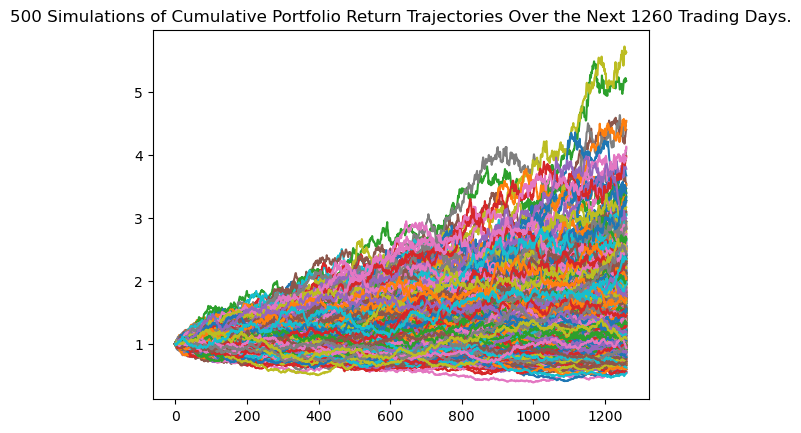

In [218]:
# Plot simulation outcomes
line_plot = MC_5year.plot_simulation()

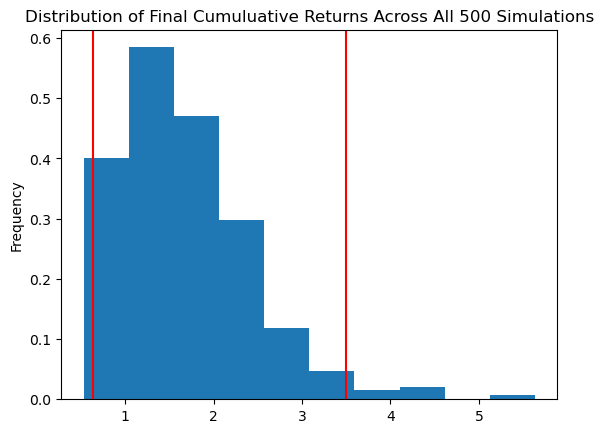

In [219]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5year.plot_distribution()

In [220]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_5year.summarize_cumulative_return()
# Print summary statistics
print(tbl) 

AttributeError: 'Series' object has no attribute 'append'

In [221]:
### Having to do it manually, again...

five_year_cumulative_returns = MC_5year.simulated_return.iloc[-1]

# Calculate summary statistics
mean = five_year_cumulative_returns.mean()
median = five_year_cumulative_returns.median()
std_dev = five_year_cumulative_returns.std()

# Calculate 5% and 95% quantiles
quantile_5 = np.percentile(five_year_cumulative_returns, 5)
quantile_95 = np.percentile(five_year_cumulative_returns, 95)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print(f"5% Quantile: {quantile_5}")
print(f"95% Quantile: {quantile_95}")

Mean: 1.6818119990587612
Median: 1.5520741904291664
Standard Deviation: 0.7609350123075342
5% Quantile: 0.6985268361934115
95% Quantile: 3.043151979820376


In [223]:
# Set initial investment -- change to $169,069.00
initial_investment_won_lotto = 169069

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $169,069
ci_upper = round(quantile_95 * initial_investment_won_lotto, 2)
ci_lower = round(quantile_5 * initial_investment_won_lotto, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_won_lotto} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $169069 in the portfolio over the next 30 years will end within in the range of $118099.23 and $514502.66


### Ten Years Retirement Option

In [224]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500
num_trading_days = 252 * 10

#Portfolio balance  --  31% bonds, 69% stocks
weights = [0.31, 0.69]


In [225]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
    portfolio_data = df_portfolio,
    weights = weights,
    num_simulation = num_sims,
    num_trading_days = num_trading_days
)

MC_5year.calc_cumulative_return()



Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000903,0.989851,0.992290,0.995505,0.997199,0.999623,1.005114,0.995010,1.003156,1.016230,...,1.009614,0.996507,1.013959,0.984152,1.004143,0.989486,0.997786,1.002354,0.988941,0.978691
2,1.003297,0.987763,0.993370,1.009488,0.991932,1.006656,1.011959,0.994860,0.990041,1.016321,...,1.012453,0.991086,1.021171,0.980291,0.990239,0.994245,0.979952,0.980441,1.006491,0.990758
3,1.011373,0.984998,0.975085,0.999244,0.997536,1.007205,1.020188,0.994659,1.003848,1.017474,...,1.017714,0.990722,1.015244,0.993701,1.000742,0.990501,0.981780,0.967028,1.014225,0.986466
4,1.017364,0.990480,0.990077,0.992240,0.986203,1.009426,1.033697,1.002702,1.005725,1.040102,...,0.992205,0.987995,1.035712,0.978047,0.993467,0.989807,0.987219,0.975026,1.017487,0.975974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.641460,0.830882,1.381934,1.744135,1.773624,1.706422,1.370172,1.179426,1.664125,3.517283,...,2.291898,5.282495,1.854718,1.619340,1.865631,1.345197,1.634841,1.071493,1.030430,1.460595
1257,2.613846,0.829179,1.407596,1.801425,1.778801,1.727744,1.384092,1.171539,1.663698,3.527620,...,2.299426,5.298645,1.848120,1.622413,1.868729,1.321860,1.635223,1.061381,1.021472,1.437722
1258,2.619856,0.829627,1.407458,1.787808,1.791232,1.735574,1.394465,1.159889,1.654767,3.594451,...,2.272338,5.307395,1.819592,1.607326,1.843454,1.326916,1.635012,1.056807,1.037060,1.429430
1259,2.599861,0.825026,1.423546,1.750765,1.796849,1.760160,1.371250,1.161396,1.657969,3.629012,...,2.272242,5.266261,1.837454,1.639369,1.867956,1.303529,1.660965,1.053973,1.034042,1.448468


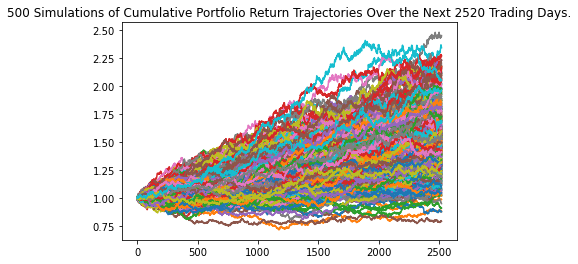

In [32]:
# Plot simulation outcomes
dist_plot = MC_10year.plot_distribution()

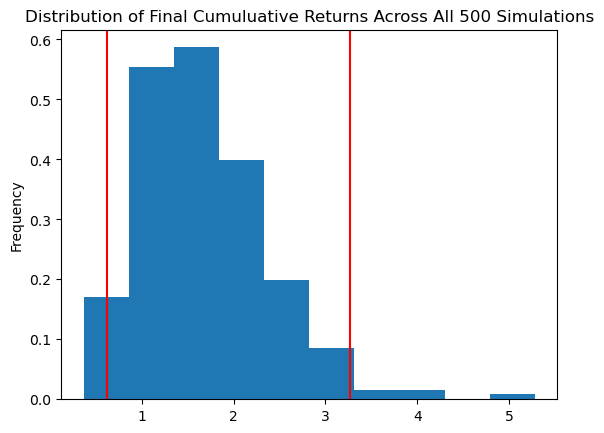

In [226]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5year.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_year_cumulative_returns = MC_5year.simulated_return.iloc[-1]

# Calculate summary statistics
mean = ten_year_cumulative_returns.mean()
median = ten_year_cumulative_returns.median()
std_dev = ten_year_cumulative_returns.std()

# Calculate 5% and 95% quantiles
quantile_5 = np.percentile(ten_year_cumulative_returns, 5)
quantile_95 = np.percentile(ten_year_cumulative_returns, 95)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print(f"5% Quantile: {quantile_5}")
print(f"95% Quantile: {quantile_95}")



count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [227]:
# Set initial investment
initial_investment_inhertiance = 240000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $240,000
ci_upper = round(quantile_95 * initial_investment_inhertiance, 2)
ci_lower = round(quantile_5 * initial_investment_inhertiance, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_inhertiance} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $240000 in the portfolio over the next 30 years will end within in the range of $167646.44 and $730356.48


### FIN.

### That was a harder assignment than I was expecting.  The repetition at the end was okay, but still struggled with the manipulation of dataframes